# K means and anomaly detection 

A continuación se presentan los siguientes ejercicios para la maestría de Data Science, en la asignatura de Statistical learning II:

Utilizar el dataset con la estatura y edad de los estudiantes de la mestría y realizar un modelo de: 

- Hard-Clustering con k-means
- Soft-Clustering con GMM usando sklearn

Ejecutar 5 experimentos para seleccionar el valor de "k":
- Ambos de métodos pueden usar el mismo valor de "k"
- Analizar el centroide de cada cluster y determinar si es posible asignar una categoría a cada cluster.

Analizar y concluir si el método del codo es adecuado para este problema.

Usar los datos en la seguna pestaña del archivo de excel en el que se encuentra el dataset y estimar: 
- El cluster que k-means asigna a cada uno.
- La probabilidad de pertenecer a cada cluster según GMM.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
 # Primero cargamos el dataset de "entrenamiento":
    
    
df  = pd.read_csv('estaturas.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Estatura  29 non-null     float64
 1   Edad      29 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 592.0 bytes


In [5]:
df.head()

,Estatura,Edad
0,1.77,26
1,1.74,31
2,1.72,24
3,1.78,34
4,1.65,32


In [6]:
df.describe()

,Estatura,Edad
count,29.000000,29.000000
mean,1.734483,28.310345
std,0.078175,4.683584
min,1.550000,21.000000
25%,1.680000,25.000000
50%,1.750000,27.000000
75%,1.790000,32.000000
max,1.850000,40.000000


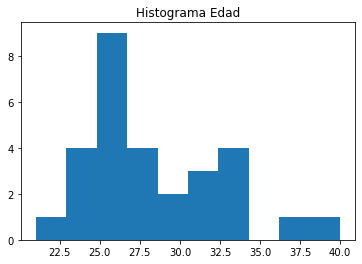

In [7]:
plt.hist(df['Edad'])
plt.title("Histograma Edad")
plt.show()

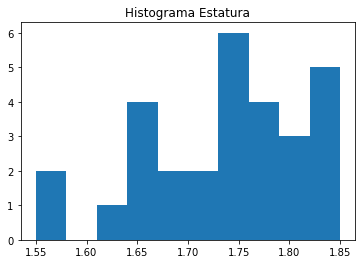

In [8]:
plt.hist(df['Estatura'])
plt.title("Histograma Estatura")
plt.show()

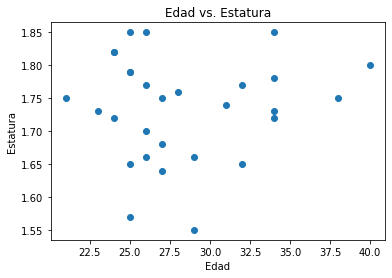

In [9]:
plt.scatter(df['Edad'], df['Estatura'])
plt.title("Edad vs. Estatura")
plt.xlabel("Edad")
plt.ylabel("Estatura")
plt.show()

In [10]:
df.iloc[:,1]

0     26
1     31
2     24
3     34
4     32
5     29
6     27
7     34
8     26
9     21
10    23
11    25
12    24
13    25
14    25
15    34
16    26
17    25
18    26
19    27
20    32
21    40
22    25
23    24
24    38
25    34
26    29
27    28
28    27
Name: Edad, dtype: int64

In [11]:
edad_rand = np.random.uniform(np.min(df['Edad']), np.max(df['Edad']), 3).reshape(-1,1)


In [12]:
estatura_rand = np.random.uniform(np.min(df['Estatura']), np.max(df['Estatura']), 3).reshape(-1,1)

In [13]:


centroids = np.concatenate((edad_rand, estatura_rand), axis = 1)


In [14]:
df = np.array(df)

In [15]:
# Switch de columnas
df[:, 0], df[:, 1] = df[:, 1], df[:, 0].copy()

In [16]:
output = list()

for i in range(0,3):
    out = np.sqrt(np.sum(np.square(np.subtract(df,centroids[i])), axis = 1))
    output.append(out)

In [17]:
final_output = np.array(output).T

In [18]:
final_output

array([[ 2.30321691,  4.46992608,  7.39640025],
       [ 2.71096416,  9.46953887,  2.39702561],
       [ 4.29708513,  2.46951571,  9.39666574],
       [ 5.70946672, 12.46969521,  0.60388336],
       [ 3.70645217, 10.46963593,  1.40405137],
       [ 0.71140778,  7.46962857,  4.39848072],
       [ 1.29637634,  5.46989065,  6.39827418],
       [ 5.71248158, 12.47030185,  0.6059845 ],
       [ 2.31157157,  4.47177035,  7.39654257],
       [ 7.29667683,  0.53226415, 12.39644005],
       [ 5.29687876,  1.46966218, 10.39656642],
       [ 3.30183457,  3.47047542,  8.39635433],
       [ 4.30175945,  2.47206825,  9.39638008],
       [ 3.29542718,  3.46994821,  8.39763549],
       [ 3.30183457,  3.47047542,  8.39635433],
       [ 5.70756463, 12.46948798,  0.60851965],
       [ 2.29816721,  4.46948651,  7.39698551],
       [ 3.29443247,  3.47218226,  8.39941525],
       [ 2.29623497,  4.46972753,  7.39761732],
       [ 1.30702132,  5.46965069,  6.39652306],
       [ 3.71101336, 10.46967109,  1.396

In [19]:
clusters = np.argmin(final_output, axis = 1)

In [20]:
clusters

array([0, 2, 1, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 0], dtype=int64)

In [21]:
out = np.empty_like(centroids)
for i in range(0,3):
    out[i] = np.mean(df[clusters == i],axis = 0)

In [22]:
out

array([[26.4       ,  1.71133333],
       [23.2       ,  1.768     ],
       [34.33333333,  1.75444444]])

In [23]:
# Implementación de Hard clustering K means

In [57]:
# inicialización de centroides random dentro de parámetros

class KMeans:
    
    def __init__(self,df,k, verbosity):
        self.verbosity = verbosity
        self.df = df
        self.k = k
        self.edad_rand = np.random.uniform(np.min(df[:,0]), np.max(df[:,0]), self.k).reshape(-1,1)
        self.estatura_rand = np.random.uniform(np.min(df[:,1]), np.max(df[:,1]), self.k).reshape(-1,1)
        self.centroids = np.concatenate((self.edad_rand, self.estatura_rand), axis = 1)
        self.clusters = np.empty_like(df[:,0])
        self.min_distances = np.empty_like(df[:,0])
        self.error = 0 
        
    def Clusters(self):
        output = list()
        for i in range(0,self.k):
            out = np.sqrt(np.sum(np.square(np.subtract(self.df,self.centroids[i])), axis = 1))
            output.append(out)
        distances = np.array(output).T
        self.min_distances = np.min(distances, axis = 1)
        self.clusters = np.argmin(distances, axis = 1)
        
    def UpdateCentroids(self):
        self.Clusters()
        output_centroids = np.empty_like(self.centroids)
        for i in range(0,self.k):
            output_centroids[i] = np.mean(self.df[self.clusters == i],axis = 0)
        return output_centroids
                 
    def Fit(self):
        last_centroids = np.zeros_like(self.centroids)
        while not (last_centroids == self.UpdateCentroids()).all():
            last_centroids = self.UpdateCentroids()
            self.centroids = last_centroids
            if self.verbosity == True:
                print('centroides:')
                print(last_centroids)
                print("****************************************************************************************")
        self.error = np.mean(self.min_distances)
        return np.concatenate((self.df,self.clusters.reshape(-1,1)), axis = 1)

    def Predict(self, test):
        output = list()
        for i in range(0, self.k):
            out = np.sqrt(np.sum(np.square(np.subtract(test, self.centroids[i])), axis = 1))
            output.append(out)
        distances = np.array(output).T
        # min_distances = np.min(distances, axis = 1)
        clusters = np.argmin(distances, axis = 1)
        return clusters
                    

In [76]:
kmeans = KMeans(df,6, True)

In [77]:
Clusters  = kmeans.Fit()

centroides:
[[26.625       1.72625   ]
 [29.66666667  1.65      ]
 [32.          1.71      ]
 [24.1         1.749     ]
 [39.          1.775     ]
 [34.          1.77      ]]
****************************************************************************************
centroides:
[[26.625       1.72625   ]
 [29.          1.605     ]
 [31.66666667  1.72      ]
 [24.1         1.749     ]
 [39.          1.775     ]
 [34.          1.77      ]]
****************************************************************************************
centroides:
[[26.42857143  1.72142857]
 [28.66666667  1.65666667]
 [31.66666667  1.72      ]
 [24.1         1.749     ]
 [39.          1.775     ]
 [34.          1.77      ]]
****************************************************************************************


In [78]:
kmeans.centroids

array([[26.42857143,  1.72142857],
       [28.66666667,  1.65666667],
       [31.66666667,  1.72      ],
       [24.1       ,  1.749     ],
       [39.        ,  1.775     ],
       [34.        ,  1.77      ]])

In [79]:
kmeans.min_distances

array([0.43131503, 0.6669666 , 0.10412012, 0.01      , 0.34060404,
       0.33335   , 0.5772012 , 0.08      , 0.44744171, 3.10000016,
       1.10016408, 0.9009334 , 0.12264175, 0.90542863, 0.9009334 ,
       0.05      , 0.42910681, 0.91762792, 0.43295143, 0.57214241,
       0.33706247, 1.00031245, 0.90564949, 0.12264175, 1.00031245,
       0.04      , 0.34998413, 0.67462747, 0.57292839])

In [80]:
kmeans.error

0.6009119758886738

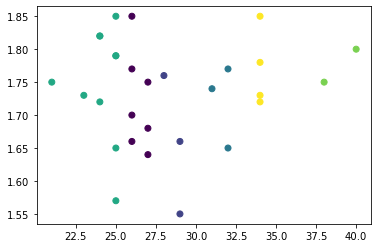

In [81]:
plt.scatter(Clusters[:,0], Clusters[:,1], c = Clusters[:,2])
plt.show()

In [39]:
from sklearn.mixture import GaussianMixture

In [44]:
gmm = GaussianMixture(n_components = 6)

In [45]:
gmm.fit(df)

GaussianMixture(n_components=6)

In [46]:
gmm.predict(df)

array([5, 2, 0, 4, 2, 3, 5, 4, 5, 0, 0, 0, 0, 0, 0, 4, 5, 0, 0, 5, 2, 1,
       5, 0, 1, 4, 3, 3, 5], dtype=int64)

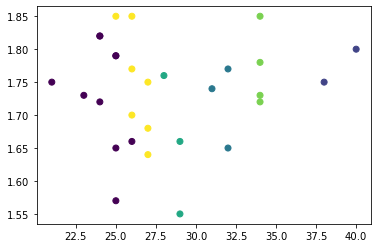

In [47]:
plt.scatter(df[:,0], df[:,1], c = gmm.predict(df))
plt.show()

In [52]:
# score de gmm
gmm.score(df)

-0.028043457373424837

In [54]:
# Probabilidades para DF
gmm.predict_proba(df)

array([[3.01897652e-001, 0.00000000e+000, 1.54962152e-033,
        1.21726678e-017, 0.00000000e+000, 6.98102348e-001],
       [2.79915046e-004, 0.00000000e+000, 9.99720085e-001,
        2.57126394e-026, 0.00000000e+000, 1.95581037e-015],
       [9.99459472e-001, 0.00000000e+000, 8.99063303e-063,
        2.17936457e-068, 0.00000000e+000, 5.40527956e-004],
       [3.06612710e-012, 0.00000000e+000, 2.41418189e-010,
        3.95080748e-126, 1.00000000e+000, 3.15784369e-046],
       [2.20641414e-005, 0.00000000e+000, 9.99977936e-001,
        1.49238834e-038, 0.00000000e+000, 3.77657315e-018],
       [2.87304183e-002, 0.00000000e+000, 4.63064404e-009,
        9.70669292e-001, 0.00000000e+000, 6.00285196e-004],
       [2.73192408e-001, 0.00000000e+000, 4.22318380e-026,
        3.28394931e-011, 0.00000000e+000, 7.26807592e-001],
       [1.44671820e-012, 0.00000000e+000, 6.45394217e-012,
        6.75509053e-140, 1.00000000e+000, 1.76075029e-051],
       [4.02239850e-001, 0.00000000e+000, 9.3997

## Experimentos para elegir k

In [101]:
# Utilización de seed para reproducibilidad de resultados

np.random.seed(42)

In [102]:
model_list = list()
for i in range(2,7):
    print(i)
    model = KMeans(df, k = i, verbosity = False)
    model_list.append(model)


2
3
4
5
6


In [106]:
error_list = list()
for i in model_list:
    i.Fit()
    error = i.error
    error_list.append(error)

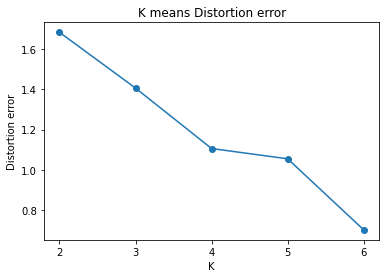

In [120]:
plt.plot(np.array([2,3,4,5,6], dtype = np.int32), error_list)
plt.scatter(np.array([2,3,4,5,6], dtype = np.int32), error_list)
plt.title("K means Distortion error")
plt.xlabel("K")
plt.ylabel("Distortion error")
plt.xticks([2,3,4,5,6])
plt.show()


Se decidirá utiliza un $k = 4$ por presentar el último punto antes del "codo". Utilizar más 6 clusters para un dataset tan pequeño de datos se vuelve inestable en la implementación del algoritmo con numpy. Además, el 6 clusters para un dataset pequeño también hace que identificar características descriptivas de cada cluster, difícil.

In [124]:
final_model = model_list[2]

In [126]:
final_model.error

1.1063353885066332

In [127]:
final_model.clusters

array([3, 2, 0, 2, 2, 3, 3, 2, 3, 0, 0, 3, 0, 3, 3, 2, 3, 3, 3, 3, 2, 1,
       3, 0, 1, 2, 3, 3, 3], dtype=int64)

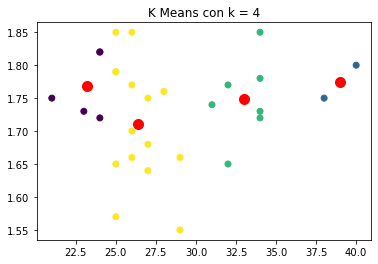

In [155]:
plt.scatter(df[:,0], df[:,1], c=final_model.clusters)
plt.scatter(final_model.centroids[:,0], final_model.centroids[:,1], color = "red", s = 100)
plt.title("K Means con k = 4")
plt.show()

In [157]:
gmm = GaussianMixture(n_components=4)
gmm.fit(df)


GaussianMixture(n_components=4)

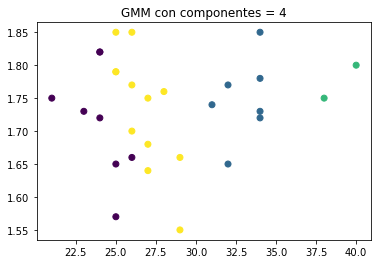

In [161]:
plt.scatter(df[:,0], df[:,1], c=gmm.predict(df))
plt.title("GMM con componentes = 4")
plt.show()

## Análisis de clusters

Parecen haber 4 clusters principales en este dataset, y los 4 dependen principalmente de la edad de los estudiantes. Parece haber agrupaciones principalmente de personas menores de aproximadamente 24 años, de 25 a 30 años, de 30 a 37 años, y los mayores de 37 años. La estatura de los estudiantes no parece tener un efecto en la determinación de los clusters.


## Datos de prueba

In [165]:
test = pd.read_csv("prueba.csv")

In [168]:
test = np.array(test)

In [170]:
# Switch de columnas
test[:, 0], test[:, 1] = test[:, 1], test[:, 0].copy()

In [172]:
gmm.predict(test)

array([3, 3, 1, 1, 1, 1, 1, 1], dtype=int64)

In [174]:
final_model.Predict(test)

array([3, 3, 2, 2, 2, 2, 2, 2], dtype=int64)

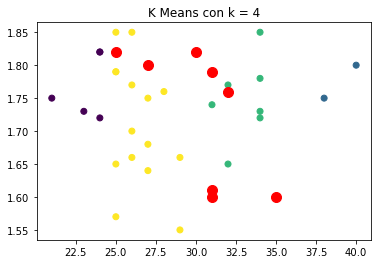

In [175]:
plt.scatter(df[:,0], df[:,1], c=final_model.clusters)
plt.scatter(test[:,0], test[:,1], color = "red", s = 100)
plt.title("K Means con k = 4")
plt.show()

## Detección de anomalías:

Usar pestaña uno para hacer el entrenamiento del modelo de detección de anomalías.

Usar pestaña dos y tres como set de validaciones(seleccionar epsilon) y pruebas.
